## 自然言語処理100本ノック

In [1]:
#0
text = "stressed"
print(text[::-1])

desserts


In [2]:
#01
text = "パタトクカシーー"
print(text[::2])

パトカー


In [3]:
text1 = "パトカー"
text2 = "タクシー"

text = ''.join([i + j for i, j in zip(text1, text2)])
print(text)

パタトクカシーー


In [4]:
import re
text = "Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics."
text = re.sub('[,\.]', "", text)
text = text.split()
i = 0
tmp = []
for i in range(len(text)):
    num = len(text[i])
    tmp.append(num)
print(tmp)

[3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9]


In [5]:
text = "Hi He Lied Because Boron Could Not Oxidize Fluorine. New Nations Might Also Sign Peace Security Clause. Arthur King Can."
text = re.sub('[,\.]', "", text)
text = text.split()
one_num = [1 ,5, 6, 7, 8, 9, 15, 16, 19]
ans = {}

for i, word in enumerate(text):
    if i+1 in one_num:
        ans[word[:1]] = i + 1
    else:
        ans[word[:2]] = i + 1
        
print(ans)

{'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10, 'Na': 11, 'Mi': 12, 'Al': 13, 'Si': 14, 'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 'Ca': 20}


In [6]:
text = "I am a NLPer"

def n_gram(text, n_gram):
    return list(zip(*[text[i:] for i in range(n_gram)]))

words_bi_gram = n_gram(text.split(), 2)
chars_bi_gram = n_gram(text, 2)

print(words_bi_gram)
print(chars_bi_gram)

[('I', 'am'), ('am', 'a'), ('a', 'NLPer')]
[('I', ' '), (' ', 'a'), ('a', 'm'), ('m', ' '), (' ', 'a'), ('a', ' '), (' ', 'N'), ('N', 'L'), ('L', 'P'), ('P', 'e'), ('e', 'r')]


In [7]:
text1 = "paraparaparadise"
text2 = "paragraph"
X = set(n_gram(text1, 2))
Y = set(n_gram(text2, 2))

union = X | Y
intersection = X & Y
difference = X - Y
print(union)
print(intersection)
print(difference)
print({("s", "e")} <= X)
print({("s", "e")} <= Y)

{('a', 'g'), ('a', 'r'), ('a', 'p'), ('g', 'r'), ('i', 's'), ('p', 'a'), ('s', 'e'), ('a', 'd'), ('r', 'a'), ('p', 'h'), ('d', 'i')}
{('r', 'a'), ('a', 'p'), ('a', 'r'), ('p', 'a')}
{('s', 'e'), ('i', 's'), ('d', 'i'), ('a', 'd')}
True
False


In [8]:
def temp_text(time, temp, temp_num):
    return str(time) + "時の" + temp + "は"+ str(temp_num)

x = 12
y = "気温"
z = 22.4
print(temp_text(x, y, z))

12時の気温は22.4


In [9]:
def cipher(str):
    rep = [chr(219 - ord(x)) if x.islower() else x for x in str]

    return ''.join(rep)

message = 'the quick brown fox jumps over the lazy dog'
message = cipher(message)
print('暗号化:', message)
message = cipher(message)
print('復号化:', message)

暗号化: gsv jfrxp yildm ulc qfnkh levi gsv ozab wlt
復号化: the quick brown fox jumps over the lazy dog


In [10]:
import random
def shuffle_text(words):
    result = []
    for word in words.split():
        if len(word) > 4:
            word = word[:1] + "".join(random.sample(word[1:-1], len(word) - 2)) + word[-1:]
            
            result.append(word)
            
    return " ".join(result)

text = "I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind ."
text = shuffle_text(text)
print(text)

c’odlunt bvleiee culod alcualty utnedsrnad riednag paoehmennl pewor huamn


In [11]:
import pandas as pd

df = pd.read_table('./popular-names.txt', header=None, sep='\t', names=['name', 'sex', 'number', 'year'])
print(len(df))

2780


In [12]:
col1 = df["name"]
col1.to_csv("./col1.txt", index=False)
print(col1.head())

0         Mary
1         Anna
2         Emma
3    Elizabeth
4       Minnie
Name: name, dtype: object


In [13]:
col2 = df["sex"]
col2.to_csv("./col2.txt", index=False)
print(col2.head())

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object


In [14]:
col1 = pd.read_table("col1.txt")
col2 = pd.read_table("col2.txt")
merged_1_2 = pd.concat([col1, col2], axis=1)
merged_1_2.to_csv("./merged_1_2.txt", sep='\t', index=False)
print(merged_1_2.head())

        name sex
0       Mary   F
1       Anna   F
2       Emma   F
3  Elizabeth   F
4     Minnie   F


In [15]:
def head_or_tail(number, head_is=True):
    if head_is:
        print(df.head(number))
    else:
        print(df.tail(number))

In [16]:
head_or_tail(5)
head_or_tail(5, False)

        name sex  number  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880
          name sex  number  year
2775  Benjamin   M   13381  2018
2776    Elijah   M   12886  2018
2777     Lucas   M   12585  2018
2778     Mason   M   12435  2018
2779     Logan   M   12352  2018


In [17]:
def split_file(N):
    tmp = df.reset_index(drop=False)
    df_cut = pd.qcut(tmp.index, N, labels=[i for i in range(N)])
    df_cut = pd.concat([df, pd.Series(df_cut, name="sp")], axis=1)
    return df_cut

df_cut = split_file(10)
print(df_cut['sp'].value_counts())

9    278
8    278
7    278
6    278
5    278
4    278
3    278
2    278
1    278
0    278
Name: sp, dtype: int64


In [18]:
print(len(df.drop_duplicates(subset="name")))

136


In [19]:
df.sort_values(by="number", ascending=False, inplace=True)
print(df.head())

         name sex  number  year
1340    Linda   F   99689  1947
1360    Linda   F   96211  1948
1350    James   M   94757  1947
1550  Michael   M   92704  1957
1351   Robert   M   91640  1947


In [20]:
print(df["name"].value_counts())

James      118
William    111
Robert     108
John       108
Mary        92
          ... 
Tracy        1
Julie        1
Laura        1
Lucas        1
Walter       1
Name: name, Length: 136, dtype: int64


In [21]:
import json

file_name = "jawiki-country.json"

with open(file_name, mode="r") as f:
    for line in f:
        line = json.loads(line)
        if line["title"] == "イギリス":
            text_uk = line['text']
            break
            
print(text_uk[:10])

{{redirect


In [22]:
import re

pattern = r'^(.*\[\[Category:.*\]\].*)$'
result = '\n'.join(re.findall(pattern, text_uk, re.MULTILINE))
print(result)

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


In [23]:
pattern = r'^.*\[\[Category:(.*?)(?:\|.*)?\]\].*$'
result = '\n'.join(re.findall(pattern,text_uk, re.MULTILINE))
print(result)

イギリス
イギリス連邦加盟国
英連邦王国
G8加盟国
欧州連合加盟国
海洋国家
現存する君主国
島国
1801年に成立した国家・領域


In [24]:
pattern = r'^(\={2,})\s*(.+?)\s*(\={2,}).*$'
result = '\n'.join(i[1] + ":" + str(len(i[0]) - 1) for i in re.findall(pattern, text_uk, re.MULTILINE))
print(result)

国名:1
歴史:1
地理:1
主要都市:2
気候:2
政治:1
元首:2
法:2
内政:2
地方行政区分:2
外交・軍事:2
経済:1
鉱業:2
農業:2
貿易:2
不動産:2
エネルギー政策:2
通貨:2
企業:2
通信:3
交通:1
道路:2
鉄道:2
海運:2
航空:2
科学技術:1
国民:1
言語:2
宗教:2
婚姻:2
移住:2
教育:2
医療:2
文化:1
食文化:2
文学:2
哲学:2
音楽:2
ポピュラー音楽:3
映画:2
コメディ:2
国花:2
世界遺産:2
祝祭日:2
スポーツ:2
サッカー:3
クリケット:3
競馬:3
モータースポーツ:3
野球:3
カーリング:3
自転車競技:3
脚注:1
関連項目:1
外部リンク:1


In [25]:
pattern = r'\[\[ファイル:(.+?)\|'
result = "\n".join(re.findall(pattern, text_uk))
print(result)

Royal Coat of Arms of the United Kingdom.svg
Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
2019 Greenwich Peninsula & Canary Wharf.jpg
Birmingham Skyline from Edgbaston Cricket Ground crop.jpg
Leeds CBD at night.jpg
Glasgow and the Clyde from the air (geograph 4665720).jpg
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg
Airbus A380-841 G-XLEB British Airways (10424102995).jpg
UKpop.svg
Anglospeak.svg
Royal Aberdeen Children's Hospital.jpg
CHANDOS3.jpg
The Fabs.JPG
Wembley Stadium, illuminated.jpg


In [26]:
pattern = r'^\{\{基礎情報.*?$(.*?)^\}\}'
template = re.findall(pattern, text_uk, re.MULTILINE + re.DOTALL)
print(template)

pattern = r'^\|(.+?)\s*=\s*(.+?)(?:(?=\n\|)|(?=\n$))'
result = dict(re.findall(pattern, template[0], re.MULTILINE + re.DOTALL))
for k, v in result.items():
    print(k + ":" + v)

['\n|略名  =イギリス\n|日本語国名 = グレートブリテン及び北アイルランド連合王国\n|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />\n*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）\n*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）\n*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）\n*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）\n*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）\n**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>\n|国旗画像 = Flag of the United Kingdom.svg\n|国章画像 = [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]\n|国章リンク =（[[イギリスの国章|国章]]）\n|標語 = {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）\n|国歌 = [[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en ico

In [27]:
def remove_markup(text):
    pattern = r'\{2, 5}'
    text = re.sub(pattern, "", text)
    
    return text

result_nm = {k: remove_markup(v) for k, v in result.items()}
for k, v in result_nm.items():
    print(k + ":" + v)

略名:イギリス
日本語国名:グレートブリテン及び北アイルランド連合王国
公式国名:{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
国旗画像:Flag of the United Kingdom.svg
国章画像:[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク:（[[イギリスの国章|国章]]）
標語:{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
国歌:[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|[[フ

In [28]:
def remove_markup(text):
    pattern = r'\'{2, 5}'
    text = re.sub(pattern, "", text)
    
    pattern = r'\[\[(?:[^|]*?\|)??([^|]*?)\]\]'
    text = re.sub(pattern, r'\1', text)
    
    return text

result_nm = {k: remove_markup(v) for k, v in result.items()}
for k, v in result_nm.items():
    print(k + ":" + v)

略名:イギリス
日本語国名:グレートブリテン及び北アイルランド連合王国
公式国名:{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（スコットランド・ゲール語）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（ウェールズ語）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（アイルランド語）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（コーンウォール語）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（スコットランド語）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
国旗画像:Flag of the United Kingdom.svg
国章画像:[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク:（国章）
標語:{{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）
国歌:[[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}
地図画像:Euro

In [29]:
def remove_markup(text):
    # 強調マークアップの除去
    pattern = r'\'{2,5}'
    text = re.sub(pattern, '', text)

    # 内部リンクマークアップの除去
    pattern = r'\[\[(?:[^|]*?\|)??([^|]*?)\]\]'
    text = re.sub(pattern, r'\1', text)

    # 外部リンクマークアップの除去
    pattern = r'https?://[\w!?/\+\-_~=;\.,*&@#$%\(\)\'\[\]]+'
    text = re.sub(pattern, '', text)

    # htmlタグの除去
    pattern = r'<.+?>' 
    text = re.sub(pattern, '', text)

    # テンプレートの除去
    pattern = r'\{\{(?:lang|仮リンク)(?:[^|]*?\|)*?([^|]*?)\}\}' 
    text = re.sub(pattern, r'\1', text)

    return text

result_rm = {k: remove_markup(v) for k, v in result.items()}
for k, v in result_rm.items():
    print(k + ': ' + v)

略名: イギリス
日本語国名: グレートブリテン及び北アイルランド連合王国
公式国名: United Kingdom of Great Britain and Northern Ireland英語以外での正式国名:
*An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath（スコットランド・ゲール語）
*Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon（ウェールズ語）
*Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann（アイルランド語）
*An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh（コーンウォール語）
*Unitit Kinrick o Great Breetain an Northren Ireland（スコットランド語）
**Claught Kängrick o Docht Brätain an Norlin Airlann、Unitet Kängdom o Great Brittain an Norlin Airlann（アルスター・スコットランド語）
国旗画像: Flag of the United Kingdom.svg
国章画像: [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク: （国章）
標語: Dieu et mon droit（フランス語:神と我が権利）
国歌: [[女王陛下万歳|God Save the Queen]]{{en icon}}神よ女王を護り賜え{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}
地図画像: Europe-UK.svg
位置画像: United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語: 英語
首都: ロンドン（事実上）
最大都市: ロンドン
元首等肩書: 女王
元首等氏名: エリザベス2世
首相

In [30]:
filename = "./neko.txt.mecab"

sentences = []
morphs = []
with open(filename, mode='r') as f:
    for line in f:
        if line != 'EOS\n':
            fields = line.split('\t')
            if len(fields) != 2 or fields[0] == '':
                continue
            else:
                attr = fields[1].split(',')
                morph = {"surface":fields[0], "base": attr[6], "pos": attr[0], "pos1": attr[1]}
                morphs.append(morph)
        else:
            sentences.append(morphs)
            morphs = []
            
for morph in sentences[2]:
    print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


In [31]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] == "動詞":
            ans.add(morph["surface"])
            
print(f'動詞の表層形の種類: {len(ans)}\n')
print("--サンプル--")
for v in list(ans)[:10]:
    print(v)

動詞の表層形の種類: 3893

--サンプル--
参り
鳴
話す
むい
のぼせ
とり
下せる
おり
押しやり
阿


In [32]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] == "名詞":
            ans.add(morph["surface"])
            
print(f'名詞の表層形のの種類: {len(ans)}\n')
print("--サンプル--")
for v in list(ans)[:10]:
    print(v)

名詞の表層形のの種類: 8463

--サンプル--
月給
摺
おり
侍従
釘付け
愚か
厘
銅鑼
打
久し振り


In [33]:
ans = set()
for sentence in sentences:
    for i in range(1, len(sentence) - 1):
        if sentence[i - 1]["pos"] == "名詞" and sentence[i]["surface"] == "の" and sentence[i + 1]["pos"] == "名詞":
            ans.add(sentence[i - 1]["surface"] + sentence[i]["surface"] + sentence[i + 1]["surface"])
            
print(f'名詞＋の＋名詞の表層形の種類: {len(ans)}\n')
print("---サンプル---")
for v in list(ans)[:10]:
    print(v)

名詞＋の＋名詞の表層形の種類: 4924

---サンプル---
回の声
ベトヴェンのシンフォニー
君の声
自分の馬鹿
中心の世
伯父の牧山
正当の手続き
主人の論理
後の今日
俳劇の二


In [34]:
ans = set()
for sentence in sentences:
    nouns = ''
    num = 0
    for morph in sentence:
        if morph["pos"] == "名詞":
            nouns = ''.join([nouns, morph["surface"]])
            num += 1
        elif num >= 2:
            ans.add(nouns)
            nouns = ''
            num = 0
            
        else:
            nouns = ''
            num = 0
    if num >= 2:
        ans.add(nouns)
        
print(f'連接名詞の種類: {len(ans)}\n')
print("---サンプル---")
for v in list(ans)[:10]:
    print(v)

連接名詞の種類: 4457

---サンプル---
大変味淋
半分妻君
先生あすこ
歓喜何もの
東郷大将
消極的修養
夫子自身
駄弁家
火消壺
元来不明瞭


In [35]:
from collections import defaultdict

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 確認
for w in ans[:10]:
    print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


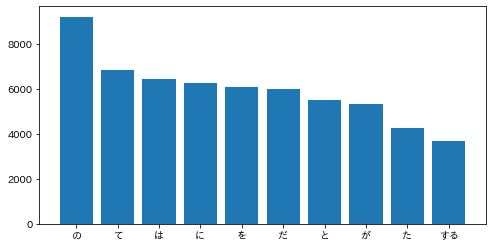

In [36]:
import matplotlib.pyplot as plt
import japanize_matplotlib

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] != "記号":
            ans[morph["base"]] += 1

ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)


keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

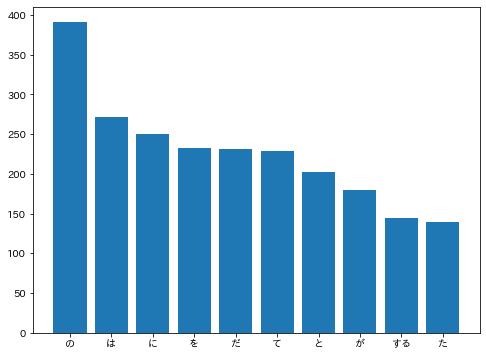

In [37]:
ans = defaultdict(int)

for sentence in sentences:
    if "猫" in [morph["surface"] for morph in sentence]:
        for morph in sentence:
            if morph["pos"] != '記号':
                ans[morph["base"]] += 1
                
del ans["猫"]
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 6))
plt.bar(keys, values)
plt.show()

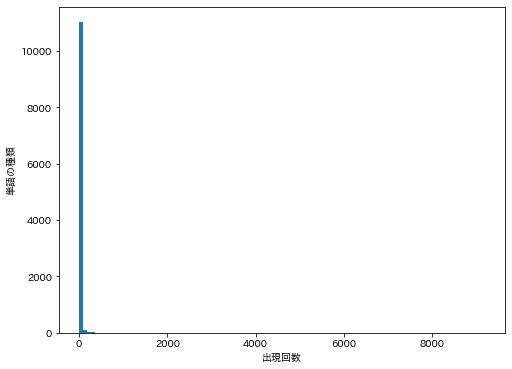

In [38]:
ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] != "記号":
            ans[morph["base"]] += 1
ans = ans.values()

plt.figure(figsize=(8, 6))
plt.hist(ans, bins=100)
plt.xlabel("出現回数")
plt.ylabel("単語の種類")
plt.show()

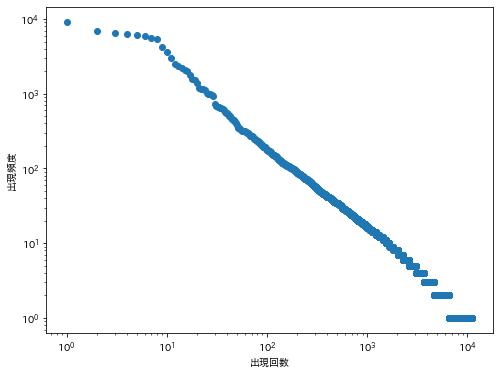

In [39]:
import math 

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph["pos"] != "記号":
            ans[morph["base"]] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 6))
plt.scatter(ranks, values)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("出現回数")
plt.ylabel("出現頻度")
plt.show()

In [40]:
class Morph:
      def __init__(self, morph):
            (surface, attr) = morph.split('\t')
            attr = attr.split(',')
            self.surface = surface
            self.base = attr[6]
            self.pos = attr[0]
            self.pos1 = attr[1]

In [41]:
filename = './ai.ja.txt.parsed'

sentences = []
morphs = []
with open(filename, mode='r') as f:
      for line in f:
            if line[0] == '*':  # 係り受け関係を表す行：スキップ
                continue
            elif line != 'EOS\n':  # 文末以外：Morphを適用し形態素リストに追加
                morphs.append(Morph(line))
            else:  # 文末：形態素リストを文リストに追加
                sentences.append(morphs)
                morphs = []

# 確認
for m in sentences[2]:
    print(vars(m))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

In [42]:
filename = "./ai.ja.txt.parsed"

sentences = []
morphs = []
with open(filename, mode='r') as f:
    for line in f:
        if line[0] == "*":
            continue
        elif line != "EOS\n":
            morphs.append(Morph(line))
        else:
            sentences.append(morphs)
            morphs = []
            
for m in sentences[2]:
    print(vars(m))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

In [43]:
class Chunk():
      def __init__(self, morphs, dst):
            self.morphs = morphs
            self.dst = dst
            self.srcs = []


class Sentence():
      def __init__(self, chunks):
            self.chunks = chunks
            for i, chunk in enumerate(self.chunks):
                  if chunk.dst not in [None, -1]:
                        self.chunks[chunk.dst].srcs.append(i)

In [44]:
filename = './ai.ja.txt.parsed'

sentences = []
chunks = []
morphs = []
with open(filename, mode='r') as f:
      for line in f:
            if line[0] == '*':# 係り受け関係を表す行：直前の文節の情報にChunkを適用し文節リストに追加 + 直後の文節の係り先を取得
                if len(morphs) > 0:         
                    chunks.append(Chunk(morphs, dst))
                    morphs = []
                dst = int(line.split(' ')[2].rstrip('D'))
            elif line != 'EOS\n':  # 文末以外：Morphを適用し形態素リストに追加
                morphs.append(Morph(line))
            else:  # 文末：直前の文節の情報にChunkを適用し文節リストに追加 + 文節リストにSentenceを適用し文リストに追加
                chunks.append(Chunk(morphs, dst))
                sentences.append(Sentence(chunks))
                morphs = []
                chunks = []
                dst = None

# 確認
for chunk in sentences[2].chunks:
    print([morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs)

['人工', '知能'] 17 []
['（', 'じん', 'こうち', 'のう', '、', '、'] 17 []
['AI'] 3 []
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 17 [2]
['「', '『', '計算'] 5 []
['（', '）', '』', 'という'] 9 [4]
['概念', 'と'] 9 []
['『', 'コンピュータ'] 8 []
['（', '）', '』', 'という'] 9 [7]
['道具', 'を'] 10 [5, 6, 8]
['用い', 'て'] 12 [9]
['『', '知能', '』', 'を'] 12 []
['研究', 'する'] 13 [10, 11]
['計算', '機', '科学'] 14 [12]
['（', '）', 'の'] 15 [13]
['一', '分野', '」', 'を'] 16 [14]
['指す'] 17 [15]
['語', '。'] 34 [0, 1, 3, 16]
['「', '言語', 'の'] 20 []
['理解', 'や'] 20 []
['推論', '、'] 21 [18, 19]
['問題', '解決', 'など', 'の'] 22 [20]
['知的', '行動', 'を'] 24 [21]
['人間', 'に'] 24 []
['代わっ', 'て'] 26 [22, 23]
['コンピューター', 'に'] 26 []
['行わ', 'せる'] 27 [24, 25]
['技術', '」', '、', 'または', '、'] 34 [26]
['「', '計算', '機'] 29 []
['（', 'コンピュータ', '）', 'による'] 31 [28]
['知的', 'な'] 31 []
['情報処理', 'システム', 'の'] 33 [29, 30]
['設計', 'や'] 33 []
['実現', 'に関する'] 34 [31, 32]
['研究', '分野', '」', 'と', 'も'] 35 [17, 27, 33]
['さ', 'れる', '。'] -1 [34]


In [45]:
sentence = sentences[2]
for chunk in sentence.chunks:
    if int(chunk.dst) != -1:
        modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
        modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
        print(modifier, modifiee, sep='\t')

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


In [46]:
sentence = sentences[2]
for chunk in sentence.chunks:
    modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
    modifier_pos = [morph.pos for morph in chunk.morphs]
    modifiee = ''.join([morph.surface if morph.pos != "記号" else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
    modifiee_pos = [morph.pos for morph in sentence.chunks[int(chunk.dst)].morphs]
    
    if "名詞" in modifier_pos and  "動詞" in modifiee_pos:
        print(modifier, modifiee, sep="\t")

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


In [47]:
import pydot
from IPython.display import Image, display_png
from graphviz import Digraph

In [59]:
sentence = sentences[7]
edges = []
for id, chunk in enumerate(sentence.chunks):
    if int(chunk.dst) != -1:
        modifier = ''.join([morph.surface if morph.pos != "記号" else '' for morph in chunk.morphs] + ['(' + str(id) + ')'])
        modifiee = ''.join([morph.surface if morph.pos != "記号" else '' for morph in sentence.chunks[int(chunk.dst)].morphs]
                           + ['(' + str(chunk.dst) + ')'])
        edges.append([modifier, modifiee])
n = pydot.Node("node")
n.fontname = "IPAGothic"
g = pydot.graph_from_edges(edges, directed=True)
g.add_node(n)


In [64]:
ls

2pageSessions.csv          cabocha-0.69.tar.bz2  neko.txt.mecab
NewsAggregatorDataset.zip  col1.txt              newsCorpora.csv
Untitled.ipynb             col2.txt              newsCorpora_re.csv
__MACOSX/                  crfpp.tar.gz          popular-names.txt
ai.ja.txt                  jawiki-country.json   readme.ai.ja.md
ai.ja.txt.cabocha          merged_1_2.txt        readme.txt
ai.ja.txt.parsed           neko.txt


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [70]:
df = pd.read_csv("./newsCorpora_re.csv", header=None, sep='\t', names = ["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])
df = df.loc[df["PUBLISHER"].isin(["Recuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]), ["TITLE", "CATEGORY"]]

In [72]:
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df["CATEGORY"])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test["CATEGORY"])

In [73]:
train.to_csv("./train.txt", sep='\t', index=False)
valid.to_csv("./valid.txt", sep='\t', index=False)
test.to_csv("./test.txt", sep='\t', index=False)

In [74]:
print(train["CATEGORY"].value_counts())
print(valid["CATEGORY"].value_counts())
print(test["CATEGORY"].value_counts())

e    4087
b    1976
t     918
m     580
Name: CATEGORY, dtype: int64
e    511
b    247
t    115
m     72
Name: CATEGORY, dtype: int64
e    511
b    247
t    115
m     73
Name: CATEGORY, dtype: int64


In [75]:
import string 
import re

def preprocessing(text):
    table = str.maketrans(string.punctuation, " "*len(string.punctuation))
    text = text.translate(table)
    text = text.lower()
    text = re.sub('[0-9]+', '0', text)
    
    return text

In [76]:
df = pd.concat([train, valid, test], axis=0)
df.reset_index(drop=True, inplace=True)

df["TITLE"] = df["TITLE"].map(lambda x: preprocessing(x))

print(df.head())

                                               TITLE CATEGORY
0  chris pine slapped with six month driving ban ...        e
1  dove criticized for  manipulative  beauty patc...        m
2  is elle fanning hollywood s coolest teen  male...        e
3  hormel to acquire muscle milk maker for  0 mil...        b
4  colin firth declares  conscious uncoupling  fr...        e


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_valid = df[:len(train) + len(valid)]
test = df[len(train) + len(valid):]

# TfidfVectorizer
vec_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2))  # ngram_rangeでTF-IDFを計算する単語の長さを指定

# ベクトル化
X_train_valid = vec_tfidf.fit_transform(train_valid['TITLE'])  # testの情報は使わない
X_test = vec_tfidf.transform(test['TITLE'])

# ベクトルをデータフレームに変換
X_train_valid = pd.DataFrame(X_train_valid.toarray(), columns=vec_tfidf.get_feature_names())
X_test = pd.DataFrame(X_test.toarray(), columns=vec_tfidf.get_feature_names())

# データの分割
X_train = X_train_valid[:len(train)]
X_valid = X_train_valid[len(train):]

# データの保存
X_train.to_csv('./X_train.txt', sep='\t', index=False)
X_valid.to_csv('./X_valid.txt', sep='\t', index=False)
X_test.to_csv('./X_test.txt', sep='\t', index=False)

    0k   0m   0s  0th  abbvie  abc  about  about the  about to  above  ...  \
0  0.0  0.0  0.0  0.0     0.0  0.0    0.0        0.0       0.0    0.0  ...   
1  0.0  0.0  0.0  0.0     0.0  0.0    0.0        0.0       0.0    0.0  ...   
2  0.0  0.0  0.0  0.0     0.0  0.0    0.0        0.0       0.0    0.0  ...   
3  0.0  0.0  0.0  0.0     0.0  0.0    0.0        0.0       0.0    0.0  ...   
4  0.0  0.0  0.0  0.0     0.0  0.0    0.0        0.0       0.0    0.0  ...   

   you can  you need  you to  young  your  your mother  yuan  zac  zac efron  \
0      0.0       0.0     0.0    0.0   0.0          0.0   0.0  0.0        0.0   
1      0.0       0.0     0.0    0.0   0.0          0.0   0.0  0.0        0.0   
2      0.0       0.0     0.0    0.0   0.0          0.0   0.0  0.0        0.0   
3      0.0       0.0     0.0    0.0   0.0          0.0   0.0  0.0        0.0   
4      0.0       0.0     0.0    0.0   0.0          0.0   0.0  0.0        0.0   

   zendaya  
0      0.0  
1      0.0  
2      0.0 

In [80]:
X_train.head()

,0k,0m,0s,0th,abbvie,abc,about,about the,about to,above,...,you can,you need,you to,young,your,your mother,yuan,zac,zac efron,zendaya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=123, max_iter=10000)
lg.fit(X_train, train["CATEGORY"])

LogisticRegression(max_iter=10000, random_state=123)

In [83]:
import numpy as np
def score_lg(lg, X):
    return [np.max(lg.predict_proba(X), axis=1), lg.predict(X)]

In [84]:
train_pred = score_lg(lg, X_train)
test_pred = score_lg(lg, X_test)

In [85]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train["CATEGORY"], train_pred[1])
test_accuracy = accuracy_score(test["CATEGORY"], test_pred[1])
print(train_accuracy, test_accuracy)

0.9030551514349954 0.854122621564482


In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

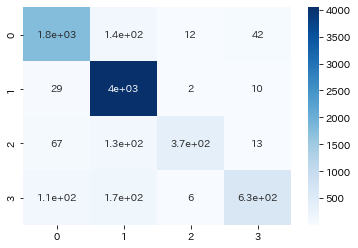

In [87]:
train_cm = confusion_matrix(train["CATEGORY"], train_pred[1])
sns.heatmap(train_cm, annot=True, cmap="Blues")
plt.show()